In [66]:
import numpy as np
import nibabel as nib
import glob
import matplotlib.pyplot as plt
import cv2
import h5py
import nrrd as nrd
import os
from tqdm import tqdm
seed = 1
np.random.seed(seed)
## the directory with datatset
root_dir = "/home/jaye/Documents/MedicalDatasets/ProstateX2/train"
image_path = []
label_path = []
for each in os.listdir(root_dir):
    if "image" in each:
        img_lst = os.listdir(os.path.join(root_dir,each))
        for case in img_lst:
            image_path.append(os.path.join(root_dir,each,case))
    elif "label" in each:
        for case in img_lst:
            case = case.replace("nii.gz","nrrd") # make sure the label is related to the corresponding image
            label_path.append(os.path.join(root_dir,each,case))

print(image_path[0])
image = nib.load(image_path[3]).get_fdata()
print(image.shape)
os.makedirs('/home/jaye/Documents/MedicalDatasets/ProstateX2/processed_training/train_npz',exist_ok=True)
os.makedirs('/home/jaye/Documents/MedicalDatasets/ProstateX2/processed_training/test_npz',exist_ok=True)
os.makedirs('/home/jaye/Documents/MedicalDatasets/ProstateX2/processed_training/lists_ProstateX2/',exist_ok=True)
train_file = open('/home/jaye/Documents/MedicalDatasets/ProstateX2/processed_training/lists_ProstateX2/train.txt','w')
test_file = open('/home/jaye/Documents/MedicalDatasets/ProstateX2/processed_training/lists_ProstateX2/test.txt','w')
for i in tqdm(range(len(img_lst))):
    name_case = image_path[i].split("/")[-1].split(".")[0]
    image = nib.load(image_path[i]).get_fdata()
    label,_ = nrd.read(label_path[i])
    """only binary classification is needed. Fuse all labels"""
    label = (label != 0 ).astype(np.uint8)
    image = image/255
    slices = image.shape[2]
    # train and val dataset split
    order = np.arange(len(img_lst))
    np.random.shuffle(order)
    test_order = order[:int(len(img_lst)/4)]
    # train dataset 
    if int(name_case[-3:]) not in test_order:
        for num in range(slices):
            case_image = cv2.resize(image[:,:,num],(224,224),interpolation=cv2.INTER_NEAREST)
            case_label = cv2.resize(label[:,:,num],(224,224),interpolation=cv2.INTER_NEAREST)
            np.savez("/home/jaye/Documents/MedicalDatasets/ProstateX2/processed_training/train_npz/" + str(name_case) + "_slice" + str(num).zfill(3),image = case_image, label=case_label)
            train_file.write(str(name_case) + "_slice" + str(num).zfill(3)+'.npz'+'\n')

else:
        for num in range(slices):
            case_image = cv2.resize(image[:,:,num],(224,224),interpolation=cv2.INTER_NEAREST)
            case_label = cv2.resize(label[:,:,num],(224,224),interpolation=cv2.INTER_NEAREST)
            np.savez("/home/jaye/Documents/MedicalDatasets/ProstateX2/processed_training/test_npz/" + str(name_case) + "_slice" + str(num).zfill(3),image = case_image, label=case_label)
            test_file.write(str(name_case) + "_slice" + str(num).zfill(3)+'.npz'+'\n')
train_file.close()
test_file.close()

/home/jaye/Documents/MedicalDatasets/ProstateX2/train/image/ProstateX-0012.nii.gz
(384, 384, 19)


100%|██████████| 78/78 [00:04<00:00, 17.39it/s]


[0 1]
(224, 224)


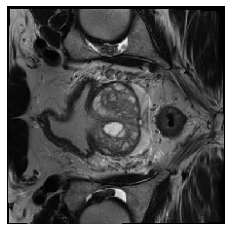

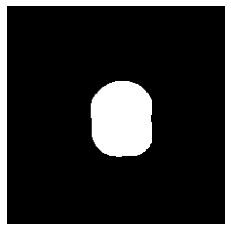

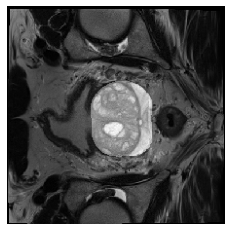

In [69]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
data = np.load('/home/jaye/Documents/MedicalDatasets/ProstateX2/processed_training/train_npz/ProstateX-0004_slice012.npz')
image, label = data['image'], data['label']
print(np.unique(label))
# label = np.array(label == 2,dtype=np.uint8)
# print(label.max())
image1 = (image * 255).astype(np.uint8)
label1 = (label*255).astype(np.uint8)
print(image.shape)
plt.imshow(image,'gray')
plt.axis('off')
plt.show()
plt.imshow(label,'gray')
plt.axis('off')
plt.show()
image_label = image * 0.6+label
plt.imshow(image_label,'gray')
plt.axis('off')
plt.show()